# CAT Solution

Comparison between Euler's Method and Runge-Kutta 4th Order Method.

Write two functions called `odeEuler` and `odeRK4` which each takes 3 input parameters `func`, `t_values`, `y_init`, where:
- `func` is a callable function that represents a differential equation;
- `t_values` is a 1D NumPy array containing values within the interval $[a, b]$;
- `y_init` is as initial value $y(t_0) = y_0$ where $t_0$ is the value $t[0]$.

Both functions are to return a NumPy array that will be used to make a plot.

The function `odeEuler` implements Euler's method while `odeRK4` implements 4th Order Runge-Kutta method to solve for the following ODE,
\begin{equation}
\frac{dy}{dt} = 2(1 - y) - e^{-4t}, \,\,\,\, y(0) = 1
\end{equation}

getting its approximate value in the interval $[0, 2]$

The ODE has the analytical solution:
\begin{equation}
y = \frac{1}{2e^{4t}} + 1 - \frac{1}{2e^{2t}}
\end{equation}

Compare the two algorithms, and outlining their behaviours.

Please copy and use the code below, only filling in your code in the sections indicated for you to do so:

In [ ]:
# importing the necessary libraries
from typing import Callable
# plotting
import matplotlib.pyplot as plt
import numpy as np
# Using NumPy arrays
from numpy.typing import NDArray


# Defining the differential equation function
def f(y: float, t: float) -> float:
    """
    Represents the differential equation:
        dy/dt = 2(1 - y) - e^(-4t)
    Args:
        y (float): Dependent variable
        t (float): Independent variable

    Returns:
        float: Value of the differential equation at given y and t
    """
    #
    ### REMOVE THE LINE BELOW (return pass) AND REPLACE WITH YOUR OWN CODE ###
    return pass


# Implementing Euler's Method to solve the ODE
def odeEuler(func: Callable, t_values: NDArray, y_init: float) -> NDArray:
    """
    Solves an Ordinary Differential Equation (ODE) using Euler's Method.

    Args:
        func (Callable): The differential equation function.
        t_values (np.ndarray): Array of time values within the interval [a, b].
        y_init (float): Initial value y(t0).

    Returns:
        np.ndarray: Array containing approximate solutions using Euler's Method.
    """
    ### REMOVE THE LINE BELOW (return pass) AND REPLACE WITH YOUR OWN CODE ###
    return pass


# Implementing the 4th Order Runge-Kutta Method to solve the ODE
def odeRK4(func: Callable, t_values: NDArray, y_init: float) -> NDArray:
    """
    Solves an Ordinary Differential Equation (ODE) using the 4th Order Runge-Kutta Method.

    Args:
        func (Callable): The differential equation function.
        t_values (np.ndarray): Array of time values within the interval [a, b].
        y_init (float): Initial value y(t0).

    Returns:
        np.ndarray: Array containing approximate solutions using the 4th Order Runge-Kutta Method.
    """
    ### REMOVE THE LINE BELOW (return pass) AND REPLACE WITH YOUR OWN CODE ###
    return pass


# n is the number of discrete steps
########################################
### CHANGE THIS VALUE TO YOUR LIKING ###
n: int = 21


##########################################################################
### DON'T CHANGE THE LINES OF CODE BELOW

# Initial value
y_init: float = 1

# The start and end interval values
t_init: float = 0
t_final: float = 2

# Independent variable discretization. Generating time values
t: NDArray = np.linspace(t_init, t_final, n)
# step size calculation
h: float = t[2] - t[1]

y_euler: NDArray = odeEuler(f, t, y_init)
y_rk4: NDArray = odeRK4(f, t, y_init)

# Generating the analytical solution
t_ana: NDArray = np.linspace(t_init, t_final, n)
y_ana: NDArray = 1 / (2*np.exp(4*t_ana)) + 1 - 1 / (2*np.exp(2*t_ana))


#### Plotting the results
plt.figure(num=1, dpi=150, figsize=(7, 5))
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']='white'
plt.plot(t_ana, y_ana, 'ro', label = "Analytical Solution", markersize=2.5)
plt.plot(t, y_euler, 'b-', label = "Euler")
plt.plot(t, y_rk4, 'k-', label = "Runge Kutta")
plt.legend(loc=4)
plt.grid(True, color='lightgray')
plt.xlabel("$t$ (-)")
plt.ylabel("$y$ (-)")
plt.ylim([0.75,1])
plt.text(s='Euler\'s Method Vs. Runge Kutta 4th Order Method', x=1, y=1.03, fontsize=15, ha='center', va='center')
plt.text(s=f'n = {n}, h = {h:.3f}', x=1, y=1.01, fontsize=11, ha='center', va='center')
plt.savefig('euler_rk_output.png', transparent=False, bbox_inches="tight")
plt.show()

## Solution

In [2]:
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

In [3]:
def f(y: float, t: float) -> float:
    return 2*(1 - y) - np.exp(-4*t)

#### Euler's Method

In [4]:
def odeEuler(func: Callable, t_values: NDArray, y_init: float) -> NDArray:
    n: int = len(t_values)
    y: NDArray = np.zeros(n)
    y[0] = y_init
    h: float = t_values[1] - t_values[0]
    
    for i in range(0, n - 1):
        y[i+1] = y[i] + h * func( y[i], t_values[i] )

    return y

#### 4th Order Runge-Kutta Method

In [5]:
def odeRK4(func: Callable, t_values: NDArray, y_init: float) -> NDArray:
    n: int = len(t_values)
    y: NDArray = np.zeros(n)
    y[0] = y_init
    h: float = t_values[1] - t_values[0]

    for i in range(0, n - 1):
        k1: float = func(y[i], t_values[i])
        k2: float =func(y[i] + 0.5 * h * k1, t_values[i] + 0.5  * h)
        k3: float = func(y[i] + 0.5 * h * k2, t_values[i] + 0.5 * h)
        k4: float = func(y[i] + h*k3, t_values[i] + h)
        y[i+1] = y[i] + ( (h/6) * (k1 + (2*k2) + (2*k3) + k4 ) )

    return y

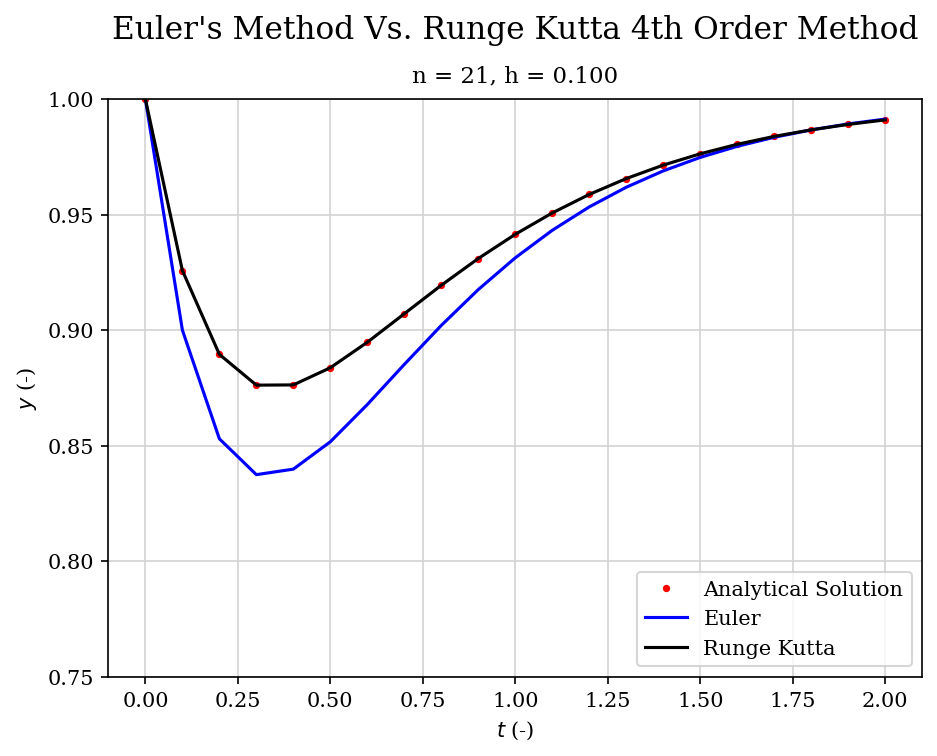

In [6]:
# Initial value
y_init: float = 1

# The start and end interval values
t_init: float = 0
t_finl: float = 2

# Independent variable discretization
n: int = 21
t: NDArray = np.linspace(t_init, t_finl, n)
# step size calculation
h: float = t[2] - t[1]


y_euler: NDArray = odeEuler(f, t, y_init)
y_rk4: NDArray = odeRK4(f, t, y_init)


# Analytical solution
t_ana: NDArray = np.linspace(t_init, t_finl, n)
y_ana: NDArray = 1 / (2*np.exp(4*t_ana)) + 1 - 1 / (2*np.exp(2*t_ana))


#### Plotting
plt.figure(num=1, dpi=150, figsize=(7, 5))
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']='white'
plt.plot(t_ana, y_ana,'ro',label = "Analytical Solution",markersize=2.5)
plt.plot(t, y_euler, 'b-', label = "Euler")
plt.plot(t, y_rk4, 'k-', label = "Runge Kutta")
plt.legend(loc=4)
plt.grid(True, color='lightgray')
plt.xlabel("$t$ (-)")
plt.ylabel("$y$ (-)")
plt.ylim([0.75,1])
plt.text(s='Euler\'s Method Vs. Runge Kutta 4th Order Method', x=1, y=1.03, fontsize=15, ha='center', va='center')
plt.text(s=f'n = {n}, h = {h:.3f}', x=1, y=1.01, fontsize=11, ha='center', va='center')
plt.savefig('euler_rk_output.png', transparent=False, bbox_inches="tight")
plt.show()

- Decresing the step size by increasing the step count, $n$, solutions computed by Euler's method and Runge-Kutta 4th Order converge
- The 4th Order Runge-Kutta generally provides more accurate results
- The 4th Order Runge-Kutta Method is more computationally intensive due to multiple function evaluations but provides higher accuracy.
- Euler's Method can become unstable for certain equations or step sizes, while the 4th Order Runge-Kutta Method is generally more stable.